## Figure 5
### polariton simulation + theoretical model

In [1]:
# Import Libraries
import Phonon_Number as pn
import parameters as params

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import clear_output
from scipy.io import savemat, loadmat

In [2]:
'''
Define and initialize parameters
'''

# Import parameters
G, omega_m, g, gamma, temperature, nth = params.polariton_params()

N = 50                                    # truncation of phonon number basis in qutip

data_points = 30                          # number of data points in arrays
pump = g*np.logspace(-1, 1, data_points)  # in MHz
T2 = g*np.logspace(-1, 1, data_points)    # in MHz

dephasing = 0                             # in MHz
incoherent_pump = 0                       # in MHz

print('nth = ', nth)

# Initializing arrays
theory = np.zeros((len(pump), len(T2)))
simulation = np.zeros((len(pump), len(T2)))

nth =  5.002659792059695


In [ ]:
'''
Iterating over pump and T2 to calculate theoretical and simulation values
'''

for i in range(len(pump)):
    for j in range(len(T2)):
        
        # theory function
        theory[i,j] = polariton_theory(g, pump[i], T2[j], gamma, nth)
        
        # simulation function
        simulation[i,j] = polariton_simulation(g, pump[i], T2[j], gamma, dephasing, incoherent_pump, nth, N)
        
        # progress monitor
        if(np.mod(i,10) == 0 and np.mod(j,10) == 0):
            print((i/100,j/100))
            
clear_output()
print('Calculations done!')

In [ ]:
'''
Save data
'''

polariton_model = {'G' : G,
                   'omega_m' : omega_m,
                   'data_points' : data_points,
                   'g' : g,
                   'pump' : pump,
                   'T2' : T2,
                   'gamma' : gamma,
                   'dephasing': dephasing,
                   'incoherent_pump': incoherent_pump,
                   'N' : N,
                   'temperature': temp,
                   'nth' : nth,
                   'theory' : theory,
                   'simulation' : simulation
                  }

savemat("./data files/polariton_model.mat", polariton_model) # saving data

In [3]:
'''
Import data for plotting
'''

# Import data
polariton_model = loadmat("./data files/polariton_model.mat")

g = polariton_model['g'][0]
T2 = polariton_model['T2']
pump = polariton_model['pump']

theory = polariton_model['theory']
simulation = polariton_model['simulation']

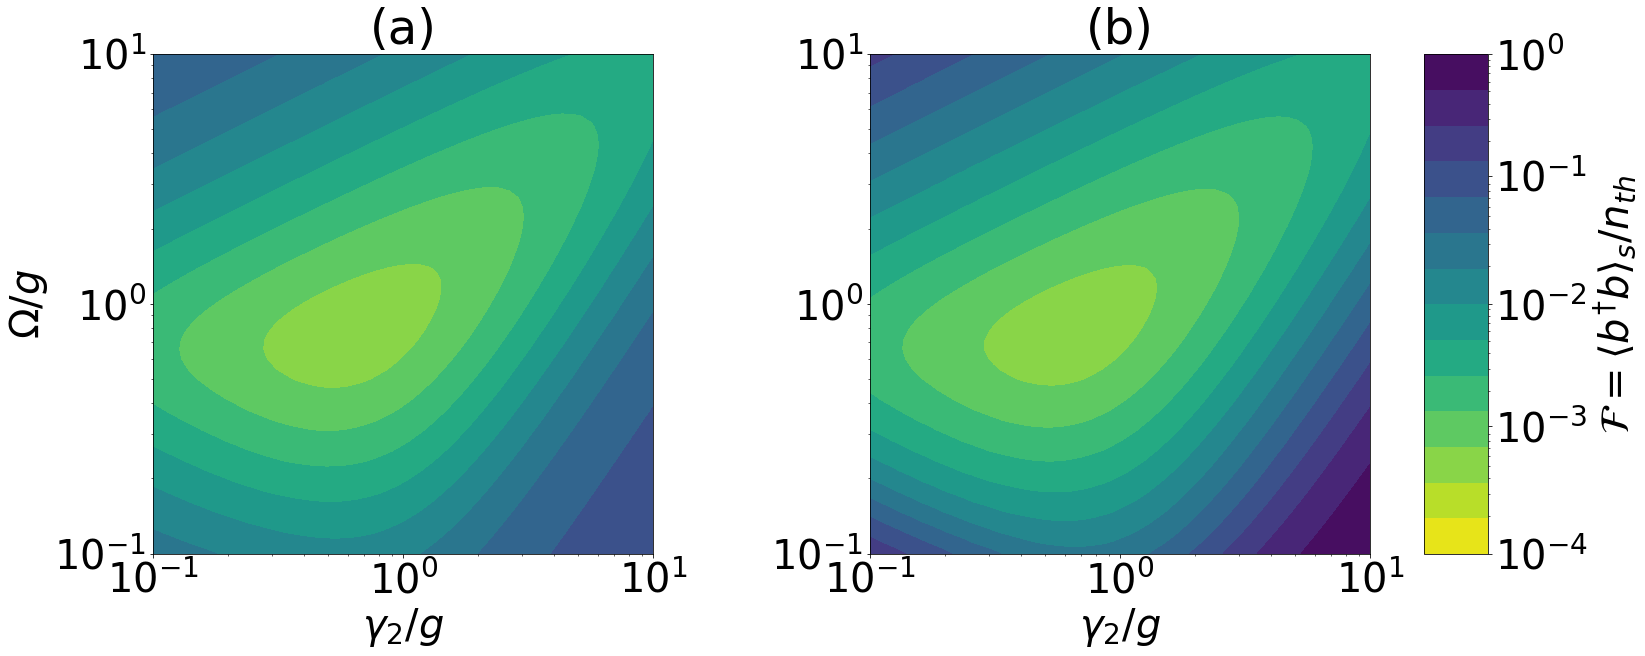

In [5]:
'''
Plotting
'''

# Define plot specifications
fig = plt.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=1) # subplot grid
[X,Y] = np.meshgrid(T2/g,pump/g) # define X,Y for contour plot
levels = np.logspace(-4, 0, 15) # finetune gradation in contour plot
locator = ticker.LogLocator(base=10)
size = theory.shape[0]-1

# theory plot
fig.add_subplot(spec[0, 0])
plt.contourf(X,Y, theory, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\gamma_2/g$')
plt.ylabel('$\Omega/g$')
# plt.title('Analytical model')
plt.title('(a)')
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')

# simulation plot
fig.add_subplot(spec[0, 1])
plt.contourf(X,Y, simulation, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r')
plt.xscale('log')
plt.yscale('log')
# plt.ylabel('$\Omega/g$')
plt.xlabel('$\gamma_2/g$')
# plt.title('Simulations')
plt.title('(b)')
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')
plt.rcParams.update({'font.size': 40})
cbar = plt.colorbar(ticks=locator, aspect = 20, shrink = 1)
cbar.set_label(r'$\mathcal{F} = \langle b^{\dagger}b \rangle_s/n_{th}$')

fig = plt.gcf()
fig.set_size_inches((23, 9), forward=False)

# fig.savefig('./figures/polariton_model.pdf')